In [1]:
# dependencies
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import argparse
import sys
import numpy as np
import os.path
import Utils.yolo_utils as yolo
import Utils.Plate_Detection as plteD

%matplotlib inline

In [2]:
input_file_name = "frame304.jpg"

input_directory_path= 'Video_Images/'

full_truck_out_directory_path = "Cropped_Images/"

file_input_path = input_directory_path+input_file_name

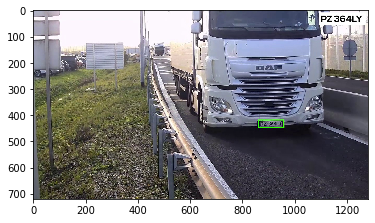

In [3]:
image = mpimg.imread(file_input_path)

inpWidth = 608  #608     #Width of network's input image
inpHeight = 608 #608     #Height of network's input image

plt.imshow(image);

In [4]:
input_file = input_file_name.replace(".jpg", '')

In [5]:
# Load names of classes
labels_file = "darknet/data/coco.names";

In [6]:
labels = None
with open(labels_file, 'rt') as f:
    labels = f.read().rstrip('\n').split('\n')

In [7]:
# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "darknet/cfg/yolov3.cfg";
modelWeights = "Weights/yolov3.weights";

In [8]:
net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

In [9]:
def get_truck_image(frame, boxes):
    max_confidence = max(confidences)
    max_confidence_idx = [i for i in range(len(confidences)) if confidences[i] == max_confidence][0]
    box=boxes[max_confidence_idx]
    cropped_truck = frame[box[1]:box[1]+box[3], box[0]:box[0]+box[2]]
    
    return cropped_truck

In [10]:
# Get the labels
confidence = 0.5
threashold = 0.3

# Intializing colors to represent each label uniquely
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

# Load the weights and configutation to form the pretrained YOLOv3 model
#net = cv.dnn.readNetFromDarknet(FLAGS.config, FLAGS.weights)

net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

# Get the output layer names of the model
layer_names = net.getLayerNames()
layer_names = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
while cv.waitKey(1) < 0:

    # get frame from the video
    hasFrame, frame = cap.read() #frame: an image object from cv2
    height, width, writer= None, None, None

    # Stop the program if reached end of video
    if not hasFrame:
        cv.waitKey(3000)
        break
    
    if width is None or height is None:
        height, width = frame.shape[:2]
        
    frame, boxes, confidences, classids, idxs = yolo.infer_image(net, layer_names, height, width, frame, colors, 
                                                                 labels, confidence, threashold, inpWidth, inpHeight)
    
    cropped= get_truck_image(frame, boxes)        

    plt.imshow(cropped)
    # Write the frame with the detection boxes
    if is_video:
        vid_writer.write(frame.astype(np.uint8))
    else:
        #plt.imshow(cropped)
        cv.imwrite(full_truck_out_directory_path+input_file+"_cropped.jpg", cropped.astype(np.uint8))    
